In [299]:
%config IPCompleter.greedy=True

In [525]:
import numpy as np
import numpy.polynomial.polynomial as poly
import pandas as pd
import matplotlib.pyplot as plt
from scipy import signal
from scipy.signal import savgol_filter
import math

In [307]:
moving_avgs = {'5-day' : None, '10-day' : None, '20-day' : None,
               '30-day' : None,'40-day' : None, '50-day' : None,
               '75-day' : None, '100-day' : None, '200-day' : None} 


In [308]:
"""
Converts a string t representing  into a pandas Timestamp object

Parameter: t is the date
Precondition: t is a date in the form of YYYY-MM-DD
"""
def toTimestamp(t):
    return pd.Timestamp(t + ' 0:00:00')

In [309]:
"""
Returns the rows of the dataframe that correspond
to times between range of start_date and end_date inclusive

Parameter df: df is a dataframe
Precondition: df is a pandas dataframe object

Paremeters start_date, end_date:
Preconditons: start_date and end_date are both date strings of the form YYYY-MM-DD
"""
def dataframeBetween(df, start_date, end_date):
    t1 = toTimestamp(start_date)
    t2 = toTimestamp(end_date)
    return df.loc[(df['Dates'] >= t1) & (df['Dates'] <= t2)]

In [310]:
audjpy_df = pd.read_excel('/Users/Ian/Downloads/AUDJPY_Data.xlsx')
col = audjpy_df['PX_LAST']
dataframeBetween(audjpy_df, "2017-10-30", "2017-10-31")

,Dates,PX_LOW,PX_HIGH,PX_OPEN,PX_LAST
281,2017-10-30,86.778,87.334,87.201,87.015
282,2017-10-31,86.693,87.163,87.015,87.006


In [311]:
"""
Returns an array of the N day simple moving average (SMA) 
of df[col] for each day between start date and end date inclusive

Parameter df: df is a dataframe
Precondition: df is pandas dataframe object

Parameter col: col is the column to caculate SMA of
Preconditon: col is a string

Paremeters start_date, end_date:
Preconditons: start_date and end_date are both date strings of the form YYYY-MM-DD
"""
def SMA(df, col, n_day, start_date, end_date):
    sma_arr = []
    sdf = dataframeBetween(df, start_date, end_date)
    sum_ = 0
    for i in range(0, len(sdf[col]) - (n_day-1)):
        n_day_arr = sdf[col][i : i + n_day]
        sum_ = 0
        for price in n_day_arr:
            sum_ = price + sum_
        sma_arr.append(sum_ / n_day)
    return sma_arr

In [312]:
"""
Returns the weighting multiplier used
in an N day EMA calculation

Parameter n_day: The length of the MA period
Precondition: n_day is an int
"""
def weightingMult(n_day):
    return 2.0 / (n_day + 1.0)

In [313]:
"""
Returns an array of the N day exponential moving average (SMA) 
of df[col] for each day between start date and end date inclusive.
EMA is calculated as follows:
EMA_0 = N day SMA
EMA_t = (Last Price - EMA_t-1 ] x multiplier) + EMA_t-1

Parameter df: df is a dataframe
Precondition: df is pandas dataframe object

Parameter col: col is the column to caculate EMA of
Preconditon: col is a string

Paremeters start_date, end_date:
Preconditons: start_date and end_date are both date strings of the form YYYY-MM-DD
"""
def EMA(df, col, n_day, start_date, end_date):
    ema_arr = []
    sdf = dataframeBetween(df, start_date, end_date)
    sum_ = 0
    weighting_mult = weightingMult(n_day)

    # SMA of first n days to initalize EMA
    n_day_arr = sdf[col][:n_day]

    for price in n_day_arr:
        sum_ = price + sum_
    ema_arr.append(sum_ / n_day)
  
    for price in sdf[col][n_day : len(sdf[col])-(n_day-1)]:    
        ema_arr.append((price - ema_arr[-1]) * weighting_mult + ema_arr[-1])
    return ema_arr

In [314]:
"""
Returns a new dataframe containing
every Nth row of the passed dataframe df. 
Starts at the first row of the df by default.
"""
def getEveryNthRow(df, n, start=0):
    return df.iloc[start::n, :]

In [587]:
audjpy_df = pd.read_excel('/Users/Ian/Downloads/AUDJPY_Data.xlsx')
#col = audjpy_df['PX_LAST']
EMA(audjpy_df, 'PX_LAST', 50, "2017-01-07", "2018-11-01")
#EMA(audjpy_df, 'PX_LAST', 50, "2016-01-04", "2018-11-01")

[86.40227999999999,
 86.42595529411764,
 86.40603547866205,
 86.36481840106745,
 86.2962372873001,
 86.24050249171971,
 86.16436513910325,
 86.11242925129528,
 86.07523594732292,
 86.05318747880045,
 86.01102326394553,
 85.94521843006531,
 85.86019025633726,
 85.77935926589267,
 85.6941687064459,
 85.60024052187939,
 85.50685854062921,
 85.37733467629081,
 85.24524312035784,
 85.14001789995166,
 85.02958582544375,
 84.9367001067989,
 84.82043735751266,
 84.69453785329648,
 84.60004617277505,
 84.50969142090152,
 84.453899600474,
 84.42472706712208,
 84.36928678998004,
 84.31778534723573,
 84.28642121597159,
 84.2816203839727,
 84.28579213362083,
 84.26246695191021,
 84.22566432634511,
 84.20214807825315,
 84.18057364381184,
 84.16196291268196,
 84.16325848473365,
 84.15760128925389,
 84.14122476810668,
 84.14949046347505,
 84.14394181784857,
 84.07398331518785,
 84.02049377341578,
 83.98063127249752,
 83.95021435985056,
 83.93589222809172,
 83.9252297877744,
 83.90333842354795,
 83.864

'\ndef plotNdayMA(df, n_day, start_date, end_date):\n    dates = dataframeBetween(df, start_date, end_date)[\'Dates\']\n   # print(dates)\n    emas = expMovingAverage(df, n_day, col, start_date, end_date)\n    print(emas[-1])\n    plt.plot(dates[len(dates) - (n_day-1)] , emas)\n    plt.show()\nplotNdayMA(audjpy_df, 100, "2018-01-02", "2018-11-01")\n'

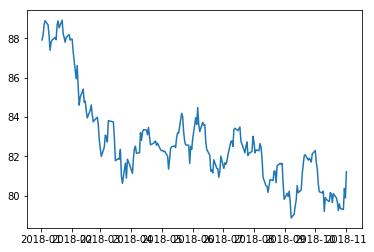

In [445]:

def plotPrice(df, start_date, end_date):
    sub_df = dataframeBetween(df, start_date, end_date)
    date = sub_df['Dates']
    price = sub_df['PX_LAST']
    return plt.plot(date, price)
    plt.show()
    
plotPrice(audjpy_df, "2018-01-02", "2018-11-01")
"""
def plotNdayMA(df, n_day, start_date, end_date):
    dates = dataframeBetween(df, start_date, end_date)['Dates']
   # print(dates)
    emas = expMovingAverage(df, n_day, col, start_date, end_date)
    print(emas[-1])
    plt.plot(dates[len(dates) - (n_day-1)] , emas)
    plt.show()
plotNdayMA(audjpy_df, 100, "2018-01-02", "2018-11-01")
"""

In [348]:
"""
Returns a list of troughs in the data between the start and end date. 
A trough is defined as a price P which satisfies P < (1 - critical_percent) * EMA
"""
def listOfTroughs(price, critical_percent, col, start_date, end_date):
    audjyp_sdf = dataframeBetween(start_date, end_date)
    time = audjyp_sdf['Dates']
    price = audjyp_sdf['PX_LAST'] 
    degree = 1
    least_squares = {}
    """for degree in range(100):
        coeffs = poly.polyfit(time, price, degree)
        vals = poly.
        np.fit1D(poly)
        least_squares[str(degree)] = """

In [498]:
"""
Returns a list of the peaks values between
start date and end date in df[col]. Smaller W 
values correspond to looking at more local minima 
and maxima scope while large W will look for
minima and maxima of a more global scope

Parameter w: w is the list of peak widths to search for
Precondition: w is a 1-D array of numbers
"""
def findPeaks(df, col, start_date, end_date, w):
    sdf = dataframeBetween(df, start_date, end_date)
    column = sdf[col].values
    return column[signal.find_peaks_cwt(column, w)]

In [546]:
def findTroughs(df, col, start_date, end_date, w):
    sdf = dataframeBetween(df, start_date, end_date)
    column = (-1 * sdf[col]).values
    return -1* np.array(column[signal.find_peaks_cwt(column, w)])

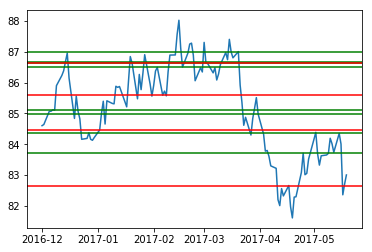

In [547]:
data = audjpy_df['PX_LAST']
#print(findPeaks(audjpy_df, 'PX_LAST', '2016-12-01', '2018-12-21', np.arange(1,100)))
#print(findTroughs(audjpy_df, 'PX_LAST', '2016-12-01', '2016-12-21', [4,10]))
def plotPeaksTroughs(df, col, start_date, end_date, w, pc = 'g', tc = 'r'):
    plotPrice(df, start_date, end_date)
    for peak in findPeaks(df, col, start_date, end_date, w):
        plt.axhline(y=peak , color=pc, linestyle='-')
    for trough in findTroughs(df, col, start_date, end_date, w):
        plt.axhline(y=trough , color=tc, linestyle='-')

plotPeaksTroughs(audjpy_df, 'PX_LAST', '2016-12-01', '2017-5-21', [1,5,6,7,9,10,100])

In [585]:
"""
Returns True if the current price of the security is at a retracement level.
Otherwise, False.
"""
def isRetracementLevel(df, col, price, start_date, end_date, w):
    rls = [0.0, 0.236, 0.382, 0.50, 0.618, 1.0]
    is_rl = False
    peaks = findPeaks(df, col, start_date, end_date, w)
    troughs = findTroughs(df, col, start_date, end_date, w)
    if peaks is None: 
        peaks = []
    if troughs is None:
        troughs = []
    peak = max(peaks)
    trough = min(troughs)
    for rl in rls:
        """for peak in peaks:
            #print((rl *peak, price))
            if abs((price - (trough))) / price < 0.01:
                is_rl = True
        for trough in troughs:
            if abs((price - rl * trough)) / price < 0.01:
                is_rl = True"""
        #print(trough + (rl * (peak - trough)), price)
        if abs(price - (trough + (rl * (peak - trough)))) < 0.01:
            
            #print((abs(price - (trough + rl * (peak - trough))) / price))
            is_rl = True
    return is_rl

False
False
False
False
False
False
False
True
False
True
True
False
False
False
False


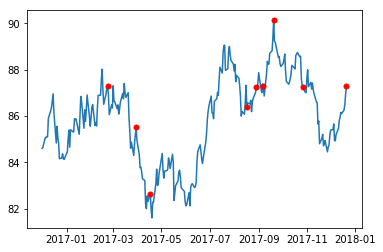

In [586]:
def plotRetracementLevels(df, col, start_date, end_date, w, c = 'r'):
    plotPrice(df, start_date, end_date)
    column = dataframeBetween(df, start_date, end_date)[col]
    
    for price in column:
        i = df.loc[df[col] == price].index[0]
        if isRetracementLevel(df, col, price, start_date, end_date, w):
            #plt.axhline(y=price, color=c, linestyle='-')
            plt.plot(df['Dates'][i], price, marker='o', markersize=5, color="red")
            
column = dataframeBetween(audjpy_df, '2016-12-01', '2016-12-21')['PX_LAST']
for price in column:
    print(isRetracementLevel(audjpy_df, 'PX_LAST', price, '2016-12-01', '2016-12-21', [4,10]))
    
plotRetracementLevels(audjpy_df, 'PX_LAST', '2016-12-01', '2017-12-21', [4,10])

In [588]:
"""
Returns the N period standard deviation of df[col]
"""
def ndayStdDev(df, col, n_day, start_date, end_date):
    ema = EMA(df, col, n_day, start_date, end_date)
    
    sd_arr = []
    sdf = dataframeBetween(df, start_date, end_date)
    sum_ = 0
    for i in range(0, len(sdf[col]) - (n_day-1)):
        n_day_arr = sdf[col][i : i + n_day]
        sum_ = 0
        for price in n_day_arr:
            sum_ = sum_ + (price - ema)**2
        sd_arr.append((sum_ / (n_day  - 1))**0.5)
    return sd_arr

In [589]:
"""
Returns the upper bollinger band array of prices where each element is the N period EMA + Kσ up to and including
price. σ is the N period standard deviation in price.

Parameter n: the N-period
Precondition: n is an int

Parameter k: the number of std deviations from the MA
Preconditon: k is a double

Parameter: price
Precondition: price is the current price of the currency pair
"""
def upperBollinger(df, col, n_day, k, start_date, end_date):
    ema = EMA(df, col, n_day, start_date, end_date)
    sdf = dataframeBetween(df, start_date, end_date)
    ub = []
    for price in sdf[col]:
        ub.append(price + k*(ndayStdDev(df, col, n_day, k, start_date, end_date)))  
    return ub

In [590]:
"""
Returns the lower bollinger band array of prices where each element is the N period EMA - Kσ up to and including
price. σ is the N period standard deviation in price.
"""
def lowerBollinger(df, col, n_day, k, start_date, end_date):
    ema = EMA(df, col, n_day, start_date, end_date)
    sdf = dataframeBetween(df, start_date, end_date)
    ub = []
    for price in sdf[col]:
        ub.append(price + k*(ndayStdDev(df, col, n_day, k, start_date, end_date)))
    return ub

In [ ]:
"""
Plots Bollinger Bands of df[col] between start_date and end_date
"""
def bollingerBands(df, col, n, k)

In [6]:
"""
Returns True if it is profitable to buy the currency pair
at the specified price
"""
def isBuy(price):
    return None

SyntaxError: invalid syntax (<ipython-input-6-49832b6af535>, line 66)

In [7]:
audjpy_df = pd.read_excel('/Users/Ian/Downloads/AUDJPY_Data.xlsx')
#col = audjpy_df['Dates']
#audjpy_df

,Dates,PX_LOW,PX_HIGH,PX_OPEN,PX_LAST
0,2016-09-30,76.501,77.758,77.145,77.617
1,2016-10-03,77.380,78.017,77.616,77.998
2,2016-10-04,77.905,78.715,77.998,78.404
3,2016-10-05,78.163,79.021,78.404,78.890
4,2016-10-06,78.466,78.998,78.895,78.846
5,2016-10-07,77.987,78.901,78.846,78.083
6,2016-10-10,78.090,78.981,78.181,78.814
7,2016-10-11,77.748,78.921,78.815,78.030
8,2016-10-12,77.986,79.036,78.030,78.804
9,2016-10-13,77.902,78.964,78.804,78.491
